In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dat = pd.read_csv('three_year.csv')

Time Stamp  Dual Fuel   Hydro  Natural Gas  Nuclear  \
0       01/01/2018 00:05:00     4619.0  2607.0       2700.0   5410.0   
1       01/01/2018 00:10:00     4624.0  2504.0       2707.0   5413.0   
2       01/01/2018 00:15:00     4651.0  2417.0       2726.0   5413.0   
3       01/01/2018 00:20:00     4609.0  2390.0       2747.0   5410.0   
4       01/01/2018 00:25:00     4557.0  2325.0       2739.0   5410.0   
...                     ...        ...     ...          ...      ...   
308194  12/31/2020 23:35:00     3081.0  3577.0       1980.0   4397.0   
308195  12/31/2020 23:40:00     3044.0  3643.0       1987.0   4397.0   
308196  12/31/2020 23:45:00     3034.0  3615.0       1988.0   4399.0   
308197  12/31/2020 23:50:00     3057.0  3597.0       1962.0   4398.0   
308198  12/31/2020 23:55:00     3080.0  3562.0       1955.0   4400.0   

        Other Fossil Fuels  Other Renewables   Wind         time_decode  year  \
0                    352.0             273.0  373.0 2018-01-01 00:05:00  2018   
1                    330.0             272.0  369.0 2018-01-01 00:10:00  2018   
2                    326.0             267.0  374.0 2018-01-01 00:15:00  2018   
3                    326.0             278.0  375.0 2018-01-01 00:20:00  2018   
4                    326.0             273.0  371.0 2018-01-01 00:25:00  2018   
...                    ...               ...    ...                 ...   ...   
308194                 2.0             260.0   62.0 2020-12-31 23:35:00  2020   
308195                 2.0             265.0   70.0 2020-12-31 23:40:00  2020   
308196                 2.0             260.0   78.0 2020-12-31 23:45:00  2020   
308197                 2.0             262.0   79.0 2020-12-31 23:50:00  2020   
308198                 2.0             263.0   73.0 2020-12-31 23:55:00  2020   

        month  day  
0           1    1  
1           1    1  
2           1    1  
3           1    1  
4           1    1  
...       ...  ...  
308194     12   31  
308195     12   31  
308196     12   31  
308197     12   31  
308198     12   31  

[308199 rows x 12 columns]

In [3]:
fuels = ['Dual Fuel','Hydro','Natural Gas','Nuclear','Other Fossil Fuels','Other Renewables','Wind','Fossil','Renew']

In [4]:
dat['time_decode'] = pd.to_datetime(dat['Time Stamp'])

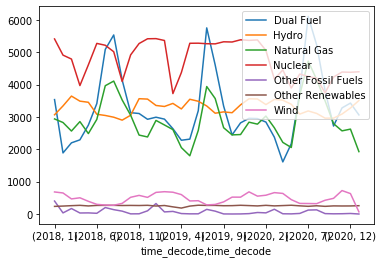

In [32]:
dat.groupby([dat['time_decode'].dt.year, dat['time_decode'].dt.month]).mean()[['Dual Fuel','Hydro','Natural Gas','Nuclear','Other Fossil Fuels',
                                                                              'Other Renewables','Wind']].plot()
plt.xticks()

In [9]:
dat['year'] = dat['time_decode'].dt.year
dat['month'] = dat['time_decode'].dt.month
dat['day'] = dat['time_decode'].dt.day

In [12]:
toplot = dat.groupby([dat['year'], dat['month']]).mean()[['Dual Fuel','Hydro','Natural Gas','Nuclear','Other Fossil Fuels',
                                                                              'Other Renewables','Wind']]

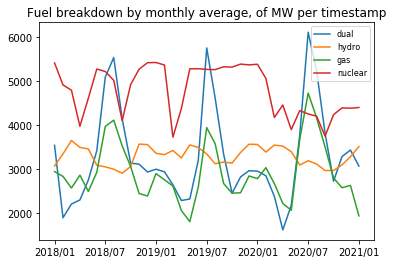

In [31]:
plt.plot(toplot.reset_index()['Dual Fuel'], label = 'dual')
plt.plot(toplot.reset_index()['Hydro'], label = 'hydro')
plt.plot(toplot.reset_index()['Natural Gas'], label = 'gas')
plt.plot(toplot.reset_index()['Nuclear'], label = 'nuclear')
plt.legend(loc = 1, prop={'size': 8})
plt.title("Fuel breakdown by monthly average, of MW per timestamp")
plt.xticks([0,6,12,18,24,30,36], ['2018/01', '2018/07', '2019/01','2019/07','2020/01','2020/07', '2021/01'])
plt.show()

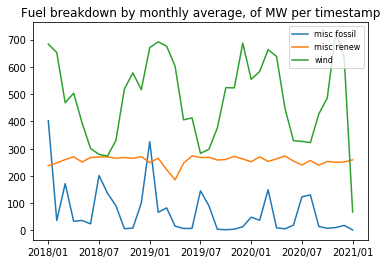

In [30]:
plt.plot(toplot.reset_index()['Other Fossil Fuels'], label = 'misc fossil')
plt.plot(toplot.reset_index()['Other Renewables'], label = 'misc renew')
plt.plot(toplot.reset_index()['Wind'], label = 'wind')
plt.legend(loc = 1, prop={'size': 8})
plt.title("Fuel breakdown by monthly average, of MW per timestamp")
plt.xticks([0,6,12,18,24,30,36], ['2018/01', '2018/07', '2019/01','2019/07','2020/01','2020/07', '2021/01'])
plt.show()

In [33]:
dat['Fossil'] = dat['Dual Fuel'] + dat['Natural Gas'] + dat['Other Fossil Fuels']
dat['Renew'] = dat['Hydro'] + dat['Nuclear'] + dat['Wind'] + dat['Other Renewables']

In [34]:
#Not responsible but im gonna mean over month to see any trends in mean

In [35]:
year_month_mean = dat.groupby([dat['year'], dat['month']]).mean()

In [36]:
t18 = year_month_mean[year_month_mean['year'] == 2018].set_index(year_month_mean[year_month_mean['year'] == 2018]['month'])
fuels18 = t18[fuels]
t19 = year_month_mean[year_month_mean['year'] == 2019].set_index(year_month_mean[year_month_mean['year'] == 2019]['month'])
fuels19 = t19[fuels]
t20 = year_month_mean[year_month_mean['year'] == 2020].set_index(year_month_mean[year_month_mean['year'] == 2020]['month'])
fuels20 = t20[fuels]

In [37]:
fuels18

Dual Fuel        Hydro  Natural Gas      Nuclear  Other Fossil Fuels  \
month                                                                           
1.0    3539.683790  3069.840564  2941.427494  5414.693110          402.469100   
2.0    1890.564526  3343.767910  2831.019352  4914.488402           36.348968   
3.0    2202.595926  3648.234780  2567.171136  4793.049373          171.662447   
4.0    2295.151022  3491.486336  2859.017586  3973.195817           33.584720   
5.0    2750.331504  3456.668382  2488.764094  4613.819897           36.654088   
6.0    3417.380873  3086.176673  2927.594566  5277.030731           24.290935   
7.0    5091.596381  3048.777345  3968.666934  5219.505211          201.457336   
8.0    5537.920543  2995.128249  4111.960442  5019.532376          136.597697   
9.0    4143.352816  2904.126497  3527.140605  4099.326141           90.760285   
10.0   3135.148246  3055.593560  3057.310523  4921.650604            6.582404   
11.0   3109.336762  3567.090497  2442.381582  5272.892848            8.546902   
12.0   2930.735491  3555.284777  2384.201059  5420.074390          100.716951   

       Other Renewables        Wind       Fossil        Renew  
month                                                          
1.0          237.599246  683.801620  6883.580384  9405.934539  
2.0          247.766244  652.674740  4757.932846  9158.697296  
3.0          259.945909  468.466452  4941.429509  9169.696513  
4.0          270.222196  503.631892  5187.753327  8238.536240  
5.0          251.256718  394.272613  5275.749686  8716.017610  
6.0          267.693640  300.778002  6369.266374  8931.679046  
7.0          269.513000  279.136525  9261.720651  8816.932081  
8.0          270.121979  272.728682  9786.478682  8557.511286  
9.0          264.722229  330.715234  7761.253705  7598.890101  
10.0         267.677516  518.668430  6199.041173  8763.590109  
11.0         264.576169  578.095273  5560.265246  9682.654788  
12.0         270.962575  516.517849  5415.653501  9762.839590

In [38]:
month_mean = dat.groupby(dat['month']).mean().reset_index().set_index(dat.groupby(dat['month']).mean().reset_index()['month'])

In [39]:
mean_fuels = month_mean[fuels]

In [40]:
a18 = fuels18 - mean_fuels
a19 = fuels19 - mean_fuels
a20 = fuels20 - mean_fuels

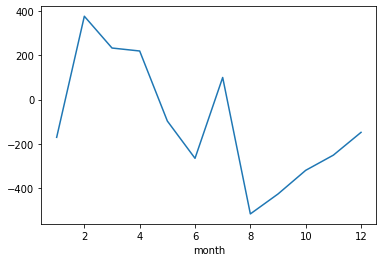

In [41]:
a19['Dual Fuel'].plot()

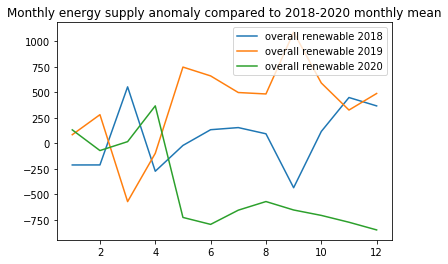

In [42]:
plt.plot(a18['Renew'], label = 'overall renewable 2018')
plt.plot(a19['Renew'], label = 'overall renewable 2019')
plt.plot(a20['Renew'], label = 'overall renewable 2020')
plt.title('Monthly energy supply anomaly compared to 2018-2020 monthly mean')
plt.legend()
plt.show()

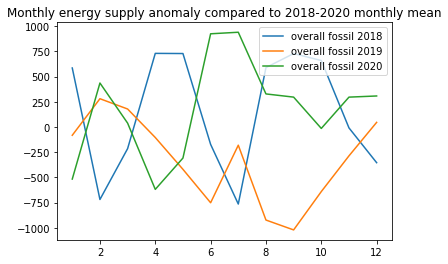

In [43]:

plt.plot(a18['Fossil'], label = 'overall fossil 2018')
plt.plot(a19['Fossil'], label = 'overall fossil 2019')
plt.plot(a20['Fossil'], label = 'overall fossil 2020')
plt.title('Monthly energy supply anomaly compared to 2018-2020 monthly mean')
plt.legend()
plt.show()

In [44]:
emfactor = dict({'Dual Fuel': 0.444, 'Natural Gas': 0.426, 'Other Fossil Fuels': 0.935, 'Other Renewables': 0.256})

In [45]:
#for trend simplicity, lets take monthly and daily mean?
emd=(dat.groupby([dat['year'], dat['month'], dat['day']]).mean()/24).reset_index() #gives average daily MW
emd['em_tot'] = emd['Dual Fuel'] * 1000 * emfactor['Dual Fuel'] + emd['Natural Gas'] * 1000 * emfactor['Natural Gas'] + emd['Other Fossil Fuels'] * 1000 * emfactor['Other Fossil Fuels'] + emd['Other Renewables'] * 1000 * emfactor['Other Fossil Fuels']

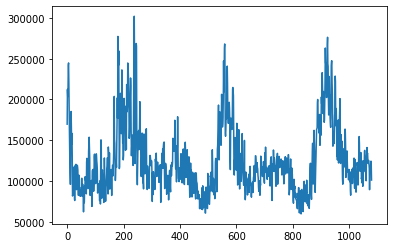

In [46]:
#daily emissions
plt.plot(emd['em_tot'])

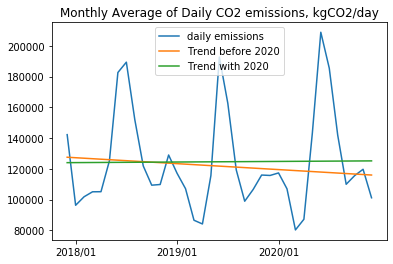

In [72]:
#monthly emission trend? have to run this chunk twice for some reason
months_em = emd.groupby([emd['year'],emd['month']]).mean().reset_index()
trend1 = np.polyfit(np.arange(0,25),months_em['em_tot'][:25], 1)
trend2 = np.polyfit(np.arange(0,37),months_em['em_tot'], 1)
plt.plot(months_em['em_tot'], label = 'daily emissions')
plt.plot(np.arange(0,37), trend1[0] * np.arange(0,37) + trend1[1], label = 'Trend before 2020')
plt.plot(np.arange(0,37), trend2[0] * np.arange(0,37) + trend2[1], label = 'Trend with 2020')
plt.title('Monthly Average of Daily CO2 emissions, kgCO2/day')
plt.xticks([1,13,25], ['2018/01','2019/01','2020/01'])
plt.legend()
plt.show()

In [54]:
#trend: emissions rising?
#try emissions/mw basically electricity efficiency
emd['em_over_mw'] = emd['em_tot'] / (emd['Fossil'] + emd['Renew'])

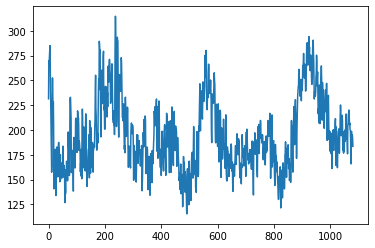

In [55]:
plt.plot(emd['em_over_mw'])

In [62]:
np.arange(0,37)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

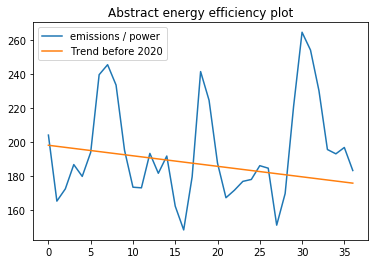

In [98]:
months_em = emd.groupby([emd['year'],emd['month']]).mean().reset_index()
trend1 = np.polyfit(np.arange(0,25),months_em['em_over_mw'][:25], 1)
trend2 = np.polyfit(np.arange(0,37),months_em['em_over_mw'], 1)
plt.plot(months_em['em_over_mw'], label = 'emissions / power')
plt.plot(np.arange(0,37), trend1[0] * np.arange(0,37) + trend1[1], label = 'Trend before 2020')
# plt.plot(np.arange(0,37), trend2[0] * np.arange(0,37) + trend2[1], label = 'Trend with 2020')
plt.legend()
plt.title('Abstract energy efficiency plot')
plt.show()

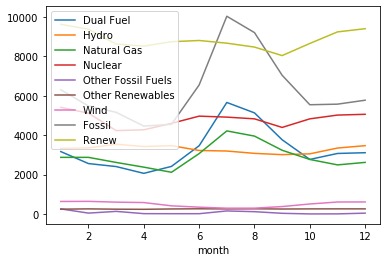

In [57]:
dat.groupby(dat['month']).mean()[fuels].plot()

In [77]:
toplot.reset_index()

year  month    Dual Fuel        Hydro  Natural Gas      Nuclear  \
0   2018      1  3539.683790  3069.840564  2941.427494  5414.693110   
1   2018      2  1890.564526  3343.767910  2831.019352  4914.488402   
2   2018      3  2202.595926  3648.234780  2567.171136  4793.049373   
3   2018      4  2295.151022  3491.486336  2859.017586  3973.195817   
4   2018      5  2750.331504  3456.668382  2488.764094  4613.819897   
5   2018      6  3417.380873  3086.176673  2927.594566  5277.030731   
6   2018      7  5091.596381  3048.777345  3968.666934  5219.505211   
7   2018      8  5537.920543  2995.128249  4111.960442  5019.532376   
8   2018      9  4143.352816  2904.126497  3527.140605  4099.326141   
9   2018     10  3135.148246  3055.593560  3057.310523  4921.650604   
10  2018     11  3109.336762  3567.090497  2442.381582  5272.892848   
11  2018     12  2930.735491  3555.284777  2384.201059  5420.074390   
12  2019      1  2995.033979  3357.904447  2895.471152  5424.639795   
13  2019      2  2935.741919  3326.827648  2755.090073  5366.960138   
14  2019      3  2640.268629  3422.043238  2611.559798  3725.199287   
15  2019      4  2282.369472  3250.870542  2054.976581  4375.353780   
16  2019      5  2317.413453  3549.701331  1802.470041  5280.912764   
17  2019      6  3195.965537  3488.280506  2586.337358  5283.650451   
18  2019      7  5756.616207  3342.489589  3943.358132  5267.256387   
19  2019      8  4610.692184  3118.336007  3572.910841  5262.761288   
20  2019      9  3337.748967  3159.630653  2669.620144  5326.659110   
21  2019     10  2447.642890  3133.797936  2448.553326  5320.110206   
22  2019     11  2819.344624  3376.495214  2458.728154  5388.531419   
23  2019     12  2960.742403  3564.246317  2841.102901  5370.669659   
24  2020      1  2952.111719  3558.286708  2780.896147  5384.765846   
25  2020      2  2844.856526  3385.575673  3031.188547  5060.641442   
26  2020      3  2377.157720  3544.441386  2667.911103  4172.426589   
27  2020      4  1612.850725  3520.728806  2216.516449  4456.762292   
28  2020      5  2174.474468  3395.208267  2058.324365  3895.932333   
29  2020      6  3770.996952  3090.849689  3675.885919  4329.828819   
30  2020      7  6113.776784  3188.478029  4728.685844  4253.015289   
31  2020      8  5231.618483  3112.137892  4163.004288  4202.958249   
32  2020      9  3814.431087  2966.143813  3500.349026  3748.077248   
33  2020     10  2721.533478  2965.850206  2795.763597  4236.661677   
34  2020     11  3281.857352  3092.586699  2572.945455  4391.497132   
35  2020     12  3432.020753  3279.889282  2626.806157  4384.014481   
36  2021      1  3066.000000  3510.000000  1931.000000  4400.000000   

    Other Fossil Fuels  Other Renewables        Wind  
0           402.469100        237.599246  683.801620  
1            36.348968        247.766244  652.674740  
2           171.662447        259.945909  468.466452  
3            33.584720        270.222196  503.631892  
4            36.654088        251.256718  394.272613  
5            24.290935        267.693640  300.778002  
6           201.457336        269.513000  279.136525  
7           136.597697        270.121979  272.728682  
8            90.760285        264.722229  330.715234  
9             6.582404        267.677516  518.668430  
10            8.546902        264.576169  578.095273  
11          100.716951        270.962575  516.517849  
12          325.670011        248.839795  670.731813  
13           66.809889        265.094161  691.893701  
14           82.740800        223.012305  675.910649  
15           15.884451        185.689135  602.180694  
16            7.178834        246.840680  405.822314  
17            7.828508        273.540382  413.006330  
18          145.560270        267.604615  282.905684  
19           90.449691        268.435251  297.929292  
20            4.426733        258.243594  376.639981  
21            2.699312        260.616399  523.959977  
22            4.647153        271.903903

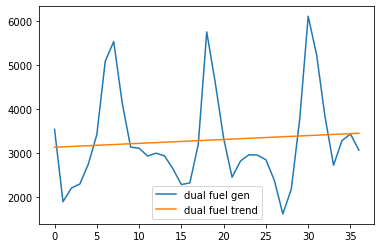

In [97]:
line1 = np.polyfit(np.arange(0,37),toplot.reset_index()['Dual Fuel'], 1)

plt.plot(toplot.reset_index()['Dual Fuel'], label = 'dual fuel gen')

plt.plot(np.arange(0,37), line1[0] * np.arange(0,37) + line1[1], label = 'dual fuel trend')

plt.legend()
plt.show()

In [92]:
line1[0]/toplot.reset_index()['Dual Fuel'].max()

0.0014480351272935926

In [93]:
line2[0]/toplot.reset_index()['Wind'].max()

0.0013171347776641947

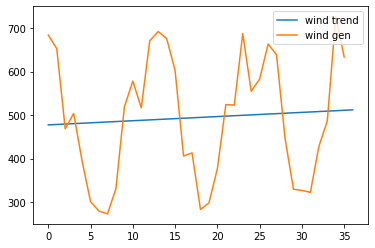

In [87]:
line2 = np.polyfit(np.arange(0,36),toplot.reset_index()['Wind'][:-1], 1)

plt.plot(np.arange(0,37), line2[0] * np.arange(0,37) + line2[1], label = 'wind trend')
plt.plot(toplot.reset_index()['Wind'][:-1], label = 'wind gen')
plt.legend()
plt.show()

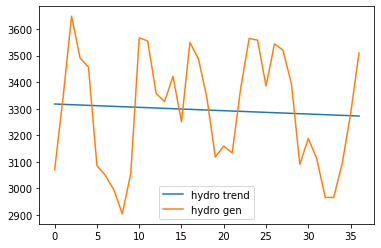

In [91]:
line3 = np.polyfit(np.arange(0,37),toplot.reset_index()['Hydro'], 1)

plt.plot(np.arange(0,37), line3[0] * np.arange(0,37) + line3[1], label = 'hydro trend')
plt.plot(toplot.reset_index()['Hydro'], label = 'hydro gen')
plt.legend()
plt.show()